## Part 1: Looking at complexity classes via sympy and plotting

In [1]:
import sympy as symp

In [2]:
x, n = symp.symbols('x n')

We can figure out how many loop iterations the inner loop of the example from the quiz takes on by symbolically summing up all n-1 iterations.

In [3]:
symp.summation(x, (x,1,n-1))

n**2/2 - n/2

We can then plot some different functions: n^2, n^2/2 - n/2, n^1.5, n*log(n), and see where they cross over.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
xs = np.arange(1,8)

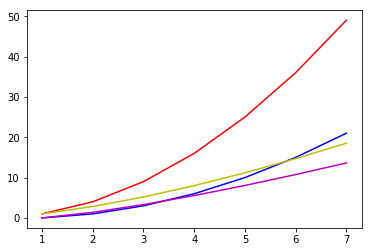

In [14]:
plt.plot(xs, xs**2, 'r', xs, (xs**2)/2 - xs/2, 'b', xs, xs**1.5, 'y', xs, xs*np.log(xs),'m')
plt.show()

## Mandelbrot set

This is the core function we iterate.  We pick some c in the complex plane, and then start z=0+0j and repeatedly call the function with the updated z values.  Given some maximum iteration count or maximum z magnitude, the function is iterated until one of those is exceeded.  The result will either be the number of iterations before the magnitude is exceeded, or the maximum iteration count.

In [22]:
def f(z,c):
    return z**2 + c

In [23]:
def iterate(c, maxiters, escapevalue):
    z = 0.0 + j*0.0
    for i in range(maxiters):
        z = f(z,c)
        if abs(z) > escapevalue:
            return i
    return maxiters

Pick some rectangle in the complex plane as a pair of low/high bounds.

In [37]:
xlo, xhi = 0.35, 0.45
ylo, yhi = 0.1, 0.2

Create an empty numpy array.

In [38]:
im = np.empty( (480, 640) )

Given the range within the complex plane and the dimensions of the numpy array, we can compute the width of each array cell with respect to the coordinate system we want to sample from the complex plane.

In [39]:
xdelt = float(xhi - xlo) / float(im.shape[1])
ydelt = float(yhi - ylo) / float(im.shape[0])

Loop over all pixels calculating the iterated result of f() where each pixel corresponds to a distinct c value.

In [43]:
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im[i,j] = iterate(complex(xlo + xdelt*j, ylo + ydelt*i), 500, 200.0)

Look at the data, both a text (not informative) and an image (informative).

In [44]:
im

array([[ 500.,  500.,  500., ...,    8.,    8.,    8.],
       [ 500.,  500.,  500., ...,    8.,    8.,    8.],
       [ 500.,  500.,  500., ...,    8.,    8.,    8.],
       ..., 
       [ 500.,  500.,  500., ...,   10.,    9.,    9.],
       [ 500.,  500.,  500., ...,   10.,    9.,    9.],
       [ 500.,  500.,  500., ...,   10.,   10.,    9.]])

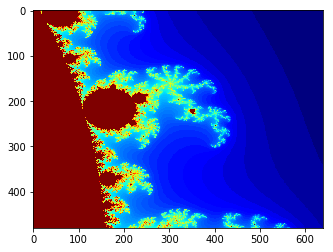

In [45]:
plt.imshow(np.log(im), cmap='jet')
plt.show()

## Basic sklearn + skimage example: clustering

In [47]:
import sklearn.cluster as cluster

In [49]:
km = cluster.KMeans(n_clusters=3)

In [53]:
x = [[1,25,6,3,99,2,4,22]]

In [54]:
out = km.fit(np.array(x).T)

In [55]:
out.labels_

array([0, 2, 0, 0, 1, 0, 0, 2], dtype=int32)

In [56]:
out.cluster_centers_

array([[  3.2],
       [ 99. ],
       [ 23.5]])

In [57]:
import skimage.io as sio

In [58]:
img = sio.imread('/Users/math300/Downloads/RAINBOW.jpg')

In [59]:
img

array([[[ 60, 112, 170],
        [ 59, 111, 169],
        [ 58, 110, 168],
        ..., 
        [ 65, 135, 195],
        [ 65, 135, 195],
        [ 64, 134, 193]],

       [[ 60, 112, 170],
        [ 59, 111, 169],
        [ 58, 110, 168],
        ..., 
        [ 64, 136, 195],
        [ 64, 136, 195],
        [ 63, 135, 193]],

       [[ 58, 110, 168],
        [ 58, 110, 168],
        [ 57, 109, 167],
        ..., 
        [ 63, 135, 194],
        [ 64, 136, 195],
        [ 63, 135, 193]],

       ..., 
       [[ 37,  25,  25],
        [ 37,  27,  25],
        [ 41,  34,  26],
        ..., 
        [ 96,  90,   6],
        [120, 116,   6],
        [123, 119,   0]],

       [[ 34,  24,  25],
        [ 33,  25,  23],
        [ 33,  30,  25],
        ..., 
        [ 98,  91,  11],
        [115, 110,   8],
        [116, 110,   0]],

       [[ 30,  22,  20],
        [ 28,  22,  22],
        [ 28,  27,  25],
        ..., 
        [ 90,  86,  12],
        [104, 104,   6],
        [106, 108,

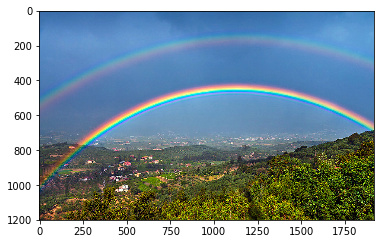

In [60]:
plt.imshow(img)
plt.show()

In [61]:
y = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))

In [62]:
y.shape

(2304000, 3)

In [64]:
out=km.fit(y)

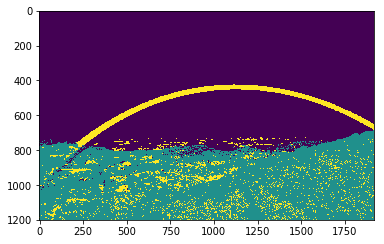

In [68]:
plt.imshow(out.labels_.reshape( (img.shape[0], img.shape[1])))
plt.show()